<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.879483,41.254653,26.558347,6.217310e-06,134.692490,134.692506,-1.654998e-05
1,0.0,1.0,43.991770,78.161585,48.059498,4.190318e-06,180.212858,180.212863,-5.040485e-06
2,0.0,2.0,57.744783,82.569399,79.210652,8.446640e-06,229.524842,229.524825,1.729717e-05
3,0.0,3.0,31.056466,27.341360,93.380281,-4.656710e-05,161.778060,161.778132,-7.182293e-05
4,0.0,4.0,80.891851,31.632697,22.781970,-9.969579e-06,145.306508,145.306532,-2.394047e-05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,29.467752,77.243440,80.946691,-3.070456e-07,197.657883,197.657883,-4.317448e-07
29996,999.0,26.0,82.072399,66.744263,89.333015,6.625917e-06,248.149684,248.149680,4.318352e-06
29997,999.0,27.0,78.934944,63.140449,95.937007,-1.712619e-06,248.012399,248.012400,-1.352535e-06
29998,999.0,28.0,87.247492,65.540221,58.452353,6.639693e-06,221.240073,221.240064,9.310141e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.879483,41.254653,26.558347,6.217310e-06,134.692490,134.692506,-1.654998e-05
1,0.0,1.0,43.991770,78.161585,48.059498,4.190318e-06,180.212858,180.212863,-5.040485e-06
2,0.0,2.0,57.744783,82.569399,79.210652,8.446640e-06,229.524842,229.524825,1.729717e-05
3,0.0,3.0,31.056466,27.341360,93.380281,-4.656710e-05,161.778060,161.778132,-7.182293e-05
4,0.0,4.0,80.891851,31.632697,22.781970,-9.969579e-06,145.306508,145.306532,-2.394047e-05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,29.467752,77.243440,80.946691,-3.070456e-07,197.657883,197.657883,-4.317448e-07
29996,999.0,26.0,82.072399,66.744263,89.333015,6.625917e-06,248.149684,248.149680,4.318352e-06
29997,999.0,27.0,78.934944,63.140449,95.937007,-1.712619e-06,248.012399,248.012400,-1.352535e-06
29998,999.0,28.0,87.247492,65.540221,58.452353,6.639693e-06,221.240073,221.240064,9.310141e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    56.879483  41.254653  ...  134.692506 -1.654998e-05
      1.0    43.991770  78.161585  ...  180.212863 -5.040485e-06
      2.0    57.744783  82.569399  ...  229.524825  1.729717e-05
      3.0    31.056466  27.341360  ...  161.778132 -7.182293e-05
      4.0    80.891851  31.632697  ...  145.306532 -2.394047e-05
...                ...        ...  ...         ...           ...
999.0 25.0   29.467752  77.243440  ...  197.657883 -4.317448e-07
      26.0   82.072399  66.744263  ...  248.149680  4.318352e-06
      27.0   78.934944  63.140449  ...  248.012400 -1.352535e-06
      28.0   87.247492  65.540221  ...  221.240064  9.310141e-06
      29.0   29.567028  22.622683  ...  139.415268 -3.121060e-05

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    56.879483  41.254653  ...  134.692506 -1.654998e-05
      1.0    43.991770  78.161585  ...  180.212863 -5.040485e-06
      2.0    57.744783  82.569399  ...  229.524825  1.729717e-05
      3.0    31.056466  27.341360  ...  161.778132 -7.182293e-05
      4.0    80.891851  31.632697  ...  145.306532 -2.394047e-05
...                ...        ...  ...         ...           ...
999.0 25.0   29.467752  77.243440  ...  197.657883 -4.317448e-07
      26.0   82.072399  66.744263  ...  248.149680  4.318352e-06
      27.0   78.934944  63.140449  ...  248.012400 -1.352535e-06
      28.0   87.247492  65.540221  ...  221.240064  9.310141e-06
      29.0   29.567028  22.622683  ...  139.415268 -3.121060e-05

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.879483,41.254653,26.558347,6.217310e-06,134.692490,134.692506,-1.654998e-05
1,0.0,1.0,43.991770,78.161585,48.059498,4.190318e-06,180.212858,180.212863,-5.040485e-06
2,0.0,2.0,57.744783,82.569399,79.210652,8.446640e-06,229.524842,229.524825,1.729717e-05
3,0.0,3.0,31.056466,27.341360,93.380281,-4.656710e-05,161.778060,161.778132,-7.182293e-05
4,0.0,4.0,80.891851,31.632697,22.781970,-9.969579e-06,145.306508,145.306532,-2.394047e-05
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,29.467752,77.243440,80.946691,-3.070456e-07,197.657883,197.657883,-4.317448e-07
29996,999.0,26.0,82.072399,66.744263,89.333015,6.625917e-06,248.149684,248.149680,4.318352e-06
29997,999.0,27.0,78.934944,63.140449,95.937007,-1.712619e-06,248.012399,248.012400,-1.352535e-06
29998,999.0,28.0,87.247492,65.540221,58.452353,6.639693e-06,221.240073,221.240064,9.310141e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    56.879483  41.254653  ...  134.692506 -1.654998e-05
      1.0    43.991770  78.161585  ...  180.212863 -5.040485e-06
      2.0    57.744783  82.569399  ...  229.524825  1.729717e-05
      3.0    31.056466  27.341360  ...  161.778132 -7.182293e-05
      4.0    80.891851  31.632697  ...  145.306532 -2.394047e-05
...                ...        ...  ...         ...           ...
999.0 25.0   29.467752  77.243440  ...  197.657883 -4.317448e-07
      26.0   82.072399  66.744263  ...  248.149680  4.318352e-06
      27.0   78.934944  63.140449  ...  248.012400 -1.352535e-06
      28.0   87.247492  65.540221  ...  221.240064  9.310141e-06
      29.0   29.567028  22.622683  ...  139.415268 -3.121060e-05

[30000 rows x 7 columns]

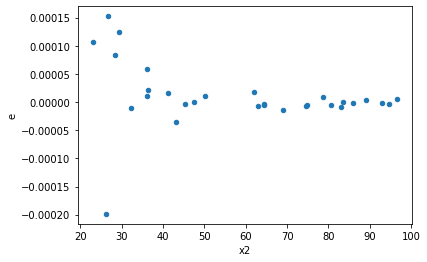

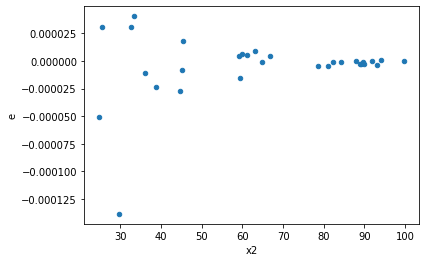

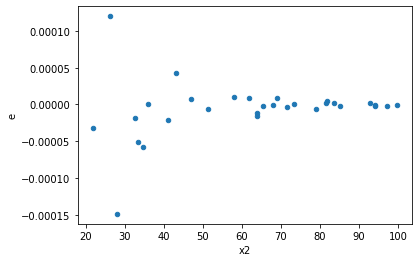

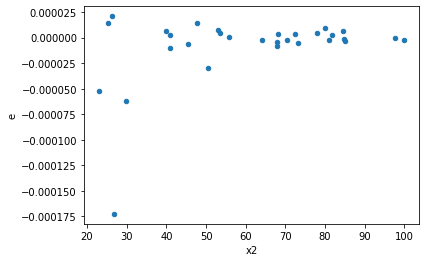

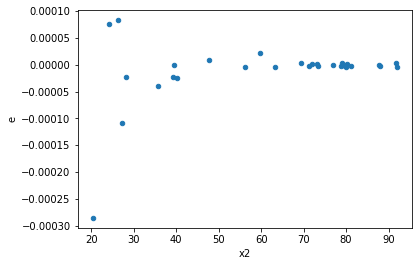

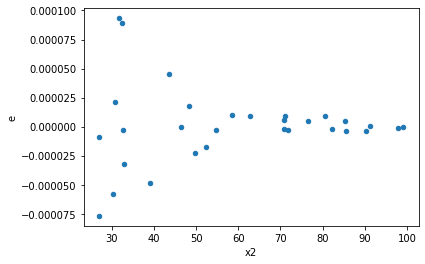

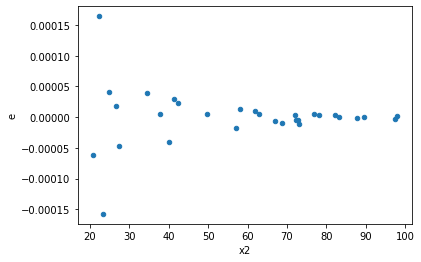

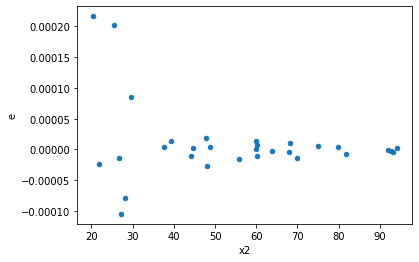

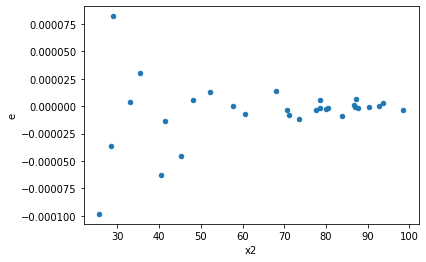

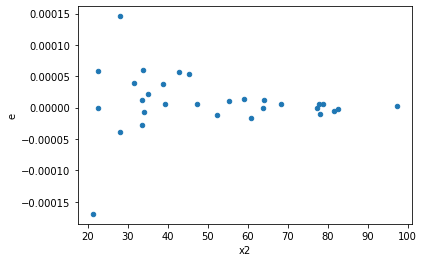

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2.4490129169255775e-10,3.2202505389590936e-08,3.061266146156972e-11,4.025313173698867e-09,0.007605038450570964,3.65414751955257e-08,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,4.978706826437304e-10,6.0614860139103695e-09,6.22338353304663e-11,7.576857517387962e-10,0.0821367370148472,0.0009683442565750676,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,1.727808498113295e-10,9.285765183884809e-09,2.1597606226416187e-11,1.160720647985601e-09,0.018607066449535675,1.8910165481940494e-06,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1.1307175728590711e-10,5.9493544172873684e-08,1.4133969660738389e-11,7.4366930216092105e-09,0.0019005718831836317,7.429458822402482e-11,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,1.377189568119056e-10,3.042132820275821e-08,1.72148696014882e-11,3.802666025344776e-09,0.004527052727415729,3.620577964110592e-09,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,3.053208734657416e-11,7.867287130891967e-08,3.81651091832177e-12,9.834108913614958e-09,0.0003880891448169699,5.902016090935973e-14,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,1.0365342028930746e-10,1.693674842400355e-08,1.2956677536163433e-11,2.117093553000444e-09,0.006120030698596491,1.3897427371850717e-08,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,5.543543761749689e-11,1.0739321392350235e-08,6.929429702187111e-12,1.3424151740437793e-09,0.005161912526147537,6.504834818119858e-09,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,3.3541038643458553e-10,5.83841257635295e-08,4.192629830432319e-11,7.2980157204411875e-09,0.005744890105798322,1.0483417977531787e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64